<a href="https://colab.research.google.com/github/stevansehn/Redes-Neurais-Artificiais---III-POSIA-2024_02/blob/main/Stevan_Sehn___Tarefa_3_Pratica_Bloco_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


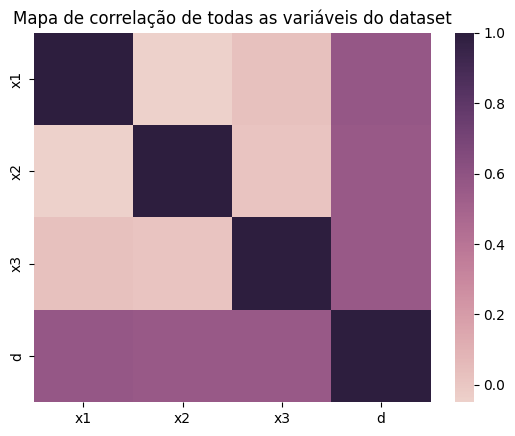

In [2]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/ressonanciaMLP.csv")
df_test = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/ressonanciaMLPTest.csv")

# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=False, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset')
ax=ax

In [3]:
trainX = df.drop('d', axis=1)
testX = df_test.drop('d', axis=1)
trainY = df['d']
testY = df_test['d']

Aplicação do MLPRegressor

In [4]:
"""
As explicações dos parâmetros de configurações do MLPRegressor podem ser obtidos no link
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
"""
mlp_reg = MLPRegressor(hidden_layer_sizes=(15), activation='tanh', solver='sgd',
                       max_iter=1000, learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

MLPRegressor(activation='tanh', hidden_layer_sizes=15, learning_rate_init=0.01,
             max_iter=1000, solver='sgd')

Avaliação do Modelo

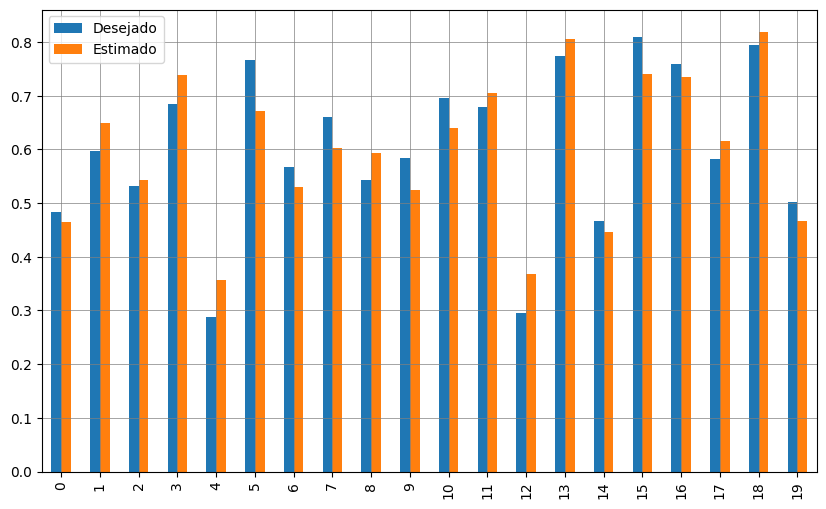

In [5]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

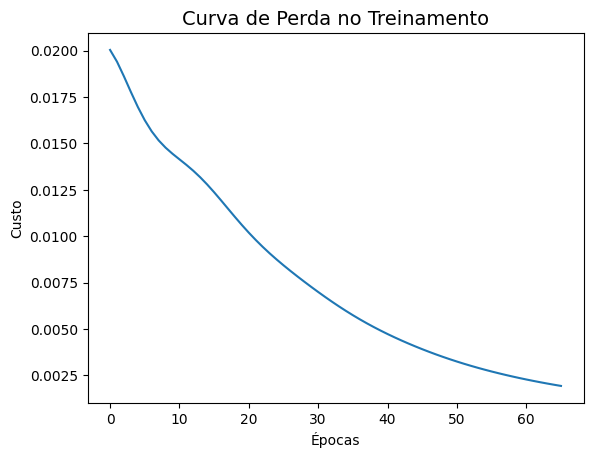

In [6]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [14]:
print('Perda Final:', mlp_reg.loss_)
print('Número de Épocas:', mlp_reg.n_iter_)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.

Perda Final: 0.0019353126061605538
Número de Épocas: 66
Mean Absolute Error (MAE): 0.04482777302176001
Mean Squared Error (MSE): 0.0024814239394275192
Root Mean Squared Error (RMSE): 0.04981389303625565
Mean Absolute Percentage Error (MAPE): 0.08303801367244526
R2:  0.8850259862011238


Rankeamento dos treinamentos segundo as métricas última perda e R2

In [11]:
ranking_loss = {
    "T1": 0.029745648670111296,
    "T2": 0.031638218544502765,
    "T3": 0.0019353126061605538,
    "T4": 0.004058907716749992,
    "T5": 0.03606217826450222,
    "T6": 0.011219036695726053,
    "T7": 0.02640951441600172,
    "T8": 0.022960357003314134,
    "T9": 0.05935583917175129,
    }
ranking_r2 = {
    "T1": -1.2826973806229054,
    "T2": -1.0697449319847,
    "T3": 0.8850259862011238,
    "T4": 0.6784103353710557,
    "T5": -0.8640408982373229,
    "T6": 0.37252138655821554,
    "T7": -0.5603993815855497,
    "T8": -0.5434297635680236,
    "T9": -2.615527990447064,
    }

In [12]:
sorted_loss = sorted(ranking_loss, key=ranking_loss.get)
print(sorted_loss)

['T3', 'T4', 'T6', 'T8', 'T7', 'T1', 'T2', 'T5', 'T9']


In [13]:
sorted_r2 = sorted(ranking_r2, key=ranking_r2.get, reverse=True)
print(sorted_r2)

['T3', 'T4', 'T6', 'T8', 'T7', 'T5', 'T2', 'T1', 'T9']
